# Final Project

## Loading libraries and Dataset

In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import re, string
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv("/Users/Lenovo/Desktop/Education/Winter term/COSC-274/dartmouth-cosc-74274-w23-session1-part1/training.csv")

test_df = pd.read_csv("/Users/Lenovo/Desktop/Education/Winter term/COSC-274/dartmouth-cosc-74274-w23-session1-part1/test.csv")

print(train_df.shape)
print(test_df.shape)

(29189, 13)
(4500, 12)


In [4]:
train_df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,category
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,2.0,NaN,{'Size:': ' Polaris H4'},automotive
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,NaN,NaN,NaN,automotive
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,NaN,NaN,NaN,automotive
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,NaN,NaN,"{'Color:': ' Clear', 'Style:': ' 45 Degree'}",automotive
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,NaN,NaN,NaN,automotive


## Check for Missing Values

In [5]:
train_df.isna().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          4
reviewText            0
summary               5
unixReviewTime        0
vote              23142
image             28589
style             13824
category              0
dtype: int64

In [6]:
na_vote = train_df['vote'].isna().sum()/len(train_df['vote'])
image_na = train_df['image'].isna().sum()/len(train_df['image'])
style_na = train_df['style'].isna().sum()/len(train_df['style'])

print("Missing Values in Vote : {}".format(na_vote))
print("Missing Values in Image : {}".format(image_na))
print("Missing Values in Style : {}".format(style_na))

Missing Values in Vote : 0.792832916509644
Missing Values in Image : 0.9794443112131282
Missing Values in Style : 0.47360306964952553


## Removing Unnecessary Columns

In [7]:
train_df = train_df.drop('vote', axis=1)
train_df = train_df.drop('image', axis=1)
train_df = train_df.drop('style', axis=1)

train_df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,automotive
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,automotive
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,automotive
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,automotive
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,automotive


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29189 entries, 0 to 29188
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         29189 non-null  int64 
 1   verified        29189 non-null  bool  
 2   reviewTime      29189 non-null  object
 3   reviewerID      29189 non-null  object
 4   asin            29189 non-null  object
 5   reviewerName    29185 non-null  object
 6   reviewText      29189 non-null  object
 7   summary         29184 non-null  object
 8   unixReviewTime  29189 non-null  int64 
 9   category        29189 non-null  object
dtypes: bool(1), int64(2), object(7)
memory usage: 2.0+ MB


In [9]:
train_df = train_df.dropna()

In [10]:
## preprocess the dataset

def preprocessing(t):
    t = t.lower()
    
    #removing punctuations
    t = t.translate(str.maketrans('','',string.punctuation))
    
    #removing digits
    t = re.sub(r'\d','', t)
    
    #removing whitespaces
    t = t.strip()
    
    return t

train_df['reviewText'] = train_df['reviewText'].apply(preprocessing)

In [11]:
stop_words = ['a', 'an', 'the', 'and', 'but', 'or', 'if', 'because', 'as', 'at', 
              'by', 'for', 'from', 'in', 'into', 'of', 'off', 'on', 
              'onto', 'out', 'over', 'to', 'up', 'with']

train_df['reviewText'] = train_df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Multiclass Classification

In [12]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

x = train_df['reviewText'].values
y = train_df['overall'].values

# cv = CountVectorizer(lowercase=True, stop_words='english')
tfidf = TfidfVectorizer(ngram_range=(1,2))
x_transformed = tfidf.fit_transform(x)

## MultiClass Classifier 1

In [13]:
xtrain, xval, ytrain, yval = train_test_split(x_transformed, y, test_size=0.2, random_state=0)

In [14]:
lr_params = {'C':[0.4,0.6,0.8,1,3,5], 'penalty':[None,'l2'],'solver':['lbfgs','liblinear','sag']}
lr = LogisticRegression(class_weight='balanced')
grid_lr_model = GridSearchCV(lr, lr_params,cv=5, scoring="f1_macro")
grid_lr_model.fit(x_transformed,y)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.4, 0.6, 0.8, 1, 3, 5], 'penalty': [None, 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag']},
             scoring='f1_macro')

In [15]:
print('Best Score : {}'.format(grid_lr_model.best_score_))
print("Best Parameter : {}".format(grid_lr_model.best_params_))

Best Score : 0.4720573189149597
Best Parameter : {'C': 3, 'penalty': 'l2', 'solver': 'sag'}


In [16]:
print('Scores : {}'.format(grid_lr_model.cv_results_['mean_test_score']))
print("Parameter : {}".format(grid_lr_model.cv_results_['params']))

Scores : [       nan        nan        nan 0.46129383 0.45421782 0.46118177
        nan        nan        nan 0.46646413 0.46201248 0.46625868
        nan        nan        nan 0.46926229 0.46391966 0.46895842
        nan        nan        nan 0.47004515 0.46607458 0.47038566
        nan        nan        nan 0.47190577 0.4720187  0.47205732
        nan        nan        nan 0.47141797 0.46977037 0.47011114]
Parameter : [{'C': 0.4, 'penalty': None, 'solver': 'lbfgs'}, {'C': 0.4, 'penalty': None, 'solver': 'liblinear'}, {'C': 0.4, 'penalty': None, 'solver': 'sag'}, {'C': 0.4, 'penalty': 'l2', 'solver': 'lbfgs'}, {'C': 0.4, 'penalty': 'l2', 'solver': 'liblinear'}, {'C': 0.4, 'penalty': 'l2', 'solver': 'sag'}, {'C': 0.6, 'penalty': None, 'solver': 'lbfgs'}, {'C': 0.6, 'penalty': None, 'solver': 'liblinear'}, {'C': 0.6, 'penalty': None, 'solver': 'sag'}, {'C': 0.6, 'penalty': 'l2', 'solver': 'lbfgs'}, {'C': 0.6, 'penalty': 'l2', 'solver': 'liblinear'}, {'C': 0.6, 'penalty': 'l2', 'solver':

In [17]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

lr_model = LogisticRegression(C=3, class_weight='balanced',penalty='l2',solver='lbfgs')
lr_model.fit(xtrain, ytrain)

yval = lb.fit_transform(yval)

ypred = lr_model.predict(xval)

ypred = lb.fit_transform(ypred)

ypred_proba = lr_model.predict_proba(xval)

cfr = classification_report(yval, ypred)
auc = roc_auc_score(yval, ypred, multi_class='ovr')

print("ROC AUC Score : {}".format(auc))
print('Classification Report:\n{}'.format(cfr))

ROC AUC Score : 0.6800698985842761
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.62      0.60      1199
           1       0.40      0.38      0.39      1173
           2       0.42      0.36      0.38      1211
           3       0.43      0.42      0.42      1135
           4       0.59      0.66      0.62      1118

   micro avg       0.49      0.49      0.49      5836
   macro avg       0.48      0.49      0.48      5836
weighted avg       0.48      0.49      0.48      5836
 samples avg       0.49      0.49      0.49      5836



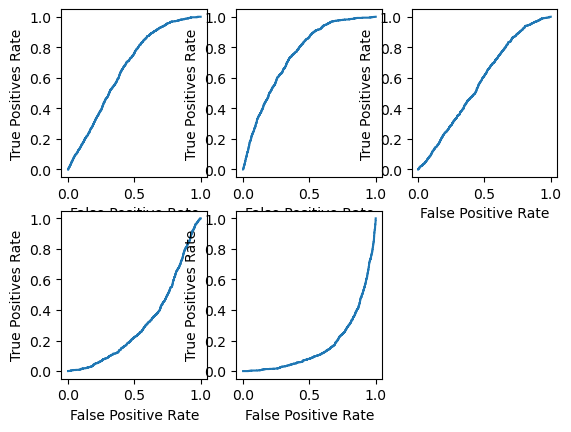

In [17]:
from sklearn.preprocessing import label_binarize

yval = label_binarize(yval, classes=(0,1,2,3,4))

plt.subplot(2,3,1)
fpr, tpr, threshold = roc_curve(yval[:,0], ypred_proba[:,1]) #class 0
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

plt.subplot(2,3,2)
fpr, tpr, threshold = roc_curve(yval[:,1], ypred_proba[:,1]) #class 1
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

plt.subplot(2,3,3)
fpr, tpr, threshold = roc_curve(yval[:,2], ypred_proba[:,1]) # class 2
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

plt.subplot(2,3,4)
fpr, tpr, threshold = roc_curve(yval[:,3], ypred_proba[:,1]) #class 3
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

plt.subplot(2,3,5)
fpr, tpr, threshold = roc_curve(yval[:,4], ypred_proba[:,1]) # class 4
plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')


plt.show()

In [31]:
xtest = test_df['reviewText']
xtest_transformed = tfidf.transform(xtest)

preds = lr_model.predict(xtest_transformed)

test_ids = list(test_df.index)

subdf = pd.DataFrame({'id':test_ids, 'predicted':preds})
subdf.head(5)

,id,predicted
0,0,1
1,1,1
2,2,1
3,3,1
4,4,2


In [17]:
subdf.to_csv('/Users/Lenovo/Desktop/Education/Winter term/COSC-274/lr_preds_multiclass.csv', index=False)

## Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb_params = {'alpha':[0.4,0.6,0.8,1,3,5]}

grid_mnb_model = GridSearchCV(mnb, mnb_params, cv=5, scoring='f1_macro')
grid_mnb_model.fit(x_transformed, y)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.4, 0.6, 0.8, 1, 3, 5]},
             scoring='f1_macro')

In [19]:
print('Best Score : {}'.format(grid_mnb_model.best_score_))
print("Best Parameter : {}".format(grid_mnb_model.best_params_))

Best Score : 0.45029754878059325
Best Parameter : {'alpha': 0.4}


In [20]:
print('Scores : {}'.format(grid_mnb_model.cv_results_['mean_test_score']))
print("Parameter : {}".format(grid_mnb_model.cv_results_['params']))

Scores : [0.45029755 0.44739934 0.44620404 0.44648247 0.43921085 0.43297168]
Parameter : [{'alpha': 0.4}, {'alpha': 0.6}, {'alpha': 0.8}, {'alpha': 1}, {'alpha': 3}, {'alpha': 5}]


In [22]:
mnb_model = MultinomialNB(alpha=0.4)
mnb_model.fit(xtrain, ytrain)

yval = lb.fit_transform(yval)

ypred = mnb_model.predict(xval)

ypred = lb.fit_transform(ypred)

ypred_proba = mnb_model.predict_proba(xval)

cfr = classification_report(yval, ypred)
auc = roc_auc_score(yval, ypred, multi_class='ovr')

print("ROC AUC Score : {}".format(auc))
print('Classification Report:\n{}'.format(cfr))

preds = mnb_model.predict(xtest_transformed)

test_ids = list(test_df.index)

subdf = pd.DataFrame({'id':test_ids, 'predicted':preds})
subdf.head(5)

ROC AUC Score : 0.6585981438975296
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56      1199
           1       0.34      0.54      0.42      1173
           2       0.40      0.30      0.34      1211
           3       0.41      0.49      0.45      1135
           4       0.73      0.40      0.52      1118

   micro avg       0.45      0.45      0.45      5836
   macro avg       0.49      0.45      0.46      5836
weighted avg       0.49      0.45      0.46      5836
 samples avg       0.45      0.45      0.45      5836



,id,predicted
0,0,1
1,1,1
2,2,1
3,3,1
4,4,2


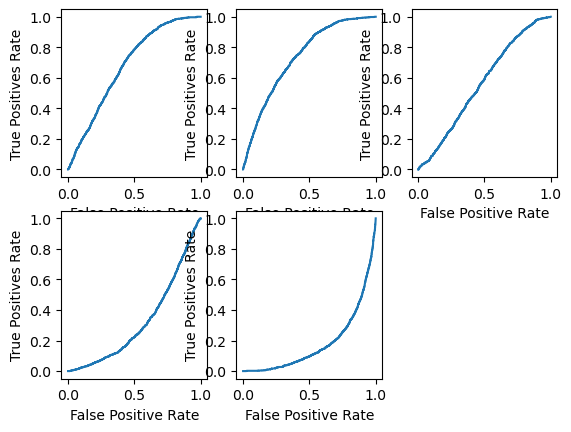

In [23]:
yval = label_binarize(yval, classes=(0,1,2,3,4))

plt.subplot(2,3,1)
fpr, tpr, threshold = roc_curve(yval[:,0], ypred_proba[:,1]) #class 0
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

plt.subplot(2,3,2)
fpr, tpr, threshold = roc_curve(yval[:,1], ypred_proba[:,1]) #class 1
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

plt.subplot(2,3,3)
fpr, tpr, threshold = roc_curve(yval[:,2], ypred_proba[:,1]) # class 2
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

plt.subplot(2,3,4)
fpr, tpr, threshold = roc_curve(yval[:,3], ypred_proba[:,1]) #class 3
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

plt.subplot(2,3,5)
fpr, tpr, threshold = roc_curve(yval[:,4], ypred_proba[:,1]) # class 4
plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')


plt.show()

In [21]:
subdf.to_csv('/Users/Lenovo/Desktop/Education/Winter term/COSC-274/naivebayes_preds_multiclass.csv', index=False)

## Ridge Classifier

In [21]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(class_weight='balanced')
model_params = {'alpha':[1,2,3], 'solver':['auto','svd','sag']}

ridge_model = GridSearchCV(ridge, model_params, cv=5, scoring="f1_macro")
ridge_model.fit(x_transformed, y)

GridSearchCV(cv=5, estimator=RidgeClassifier(class_weight='balanced'),
             param_grid={'alpha': [1, 2, 3], 'solver': ['auto', 'svd', 'sag']},
             scoring='f1_macro')

In [22]:
print('Best Score : {}'.format(ridge_model.best_score_))
print("Best Parameter : {}".format(ridge_model.best_params_))

Best Score : 0.46764789913510374
Best Parameter : {'alpha': 2, 'solver': 'sag'}


In [23]:
print('Scores : {}'.format(ridge_model.cv_results_['mean_test_score']))
print("Parameter : {}".format(ridge_model.cv_results_['params']))

Scores : [0.46353602        nan 0.46419806 0.46700626        nan 0.4676479
 0.46682743        nan 0.4666067 ]
Parameter : [{'alpha': 1, 'solver': 'auto'}, {'alpha': 1, 'solver': 'svd'}, {'alpha': 1, 'solver': 'sag'}, {'alpha': 2, 'solver': 'auto'}, {'alpha': 2, 'solver': 'svd'}, {'alpha': 2, 'solver': 'sag'}, {'alpha': 3, 'solver': 'auto'}, {'alpha': 3, 'solver': 'svd'}, {'alpha': 3, 'solver': 'sag'}]


In [35]:
ridge_model = RidgeClassifier(alpha=2, solver='sag', class_weight='balanced')
ridge_model.fit(xtrain, ytrain)

yval = lb.fit_transform(yval)

ypred = ridge_model.predict(xval)

ypred = lb.fit_transform(ypred)

ypred_proba = ridge_model.decision_function(xval)

cfr = classification_report(yval, ypred)
auc = roc_auc_score(yval, ypred, multi_class='ovr')

print("ROC AUC Score : {}".format(auc))
print('Classification Report:\n{}'.format(cfr))

preds = mnb_model.predict(xtest_transformed)

test_ids = list(test_df.index)

subdf = pd.DataFrame({'id':test_ids, 'predicted':preds})
subdf.head(5)

ROC AUC Score : 0.68156237082393
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.67      0.60      1199
           1       0.41      0.33      0.36      1173
           2       0.43      0.33      0.37      1211
           3       0.44      0.41      0.43      1135
           4       0.56      0.71      0.63      1118

   micro avg       0.49      0.49      0.49      5836
   macro avg       0.48      0.49      0.48      5836
weighted avg       0.48      0.49      0.48      5836
 samples avg       0.49      0.49      0.49      5836



,id,predicted
0,0,1
1,1,1
2,2,1
3,3,1
4,4,2


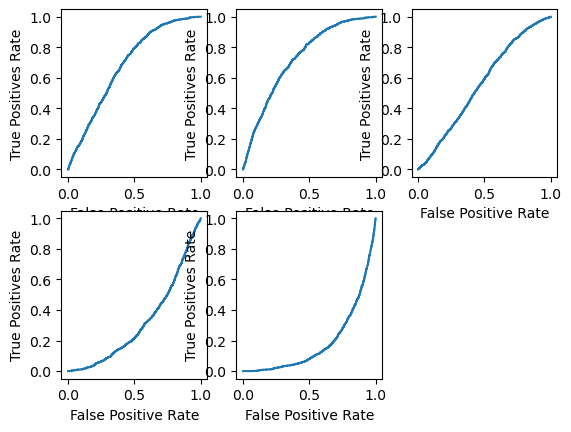

In [36]:
yval = label_binarize(yval, classes=(0,1,2,3,4))

plt.subplot(2,3,1)
fpr, tpr, threshold = roc_curve(yval[:,0], ypred_proba[:,1]) #class 0
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

plt.subplot(2,3,2)
fpr, tpr, threshold = roc_curve(yval[:,1], ypred_proba[:,1]) #class 1
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

plt.subplot(2,3,3)
fpr, tpr, threshold = roc_curve(yval[:,2], ypred_proba[:,1]) # class 2
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

plt.subplot(2,3,4)
fpr, tpr, threshold = roc_curve(yval[:,3], ypred_proba[:,1]) #class 3
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

plt.subplot(2,3,5)
fpr, tpr, threshold = roc_curve(yval[:,4], ypred_proba[:,1]) # class 4
plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')


plt.show()

In [37]:
preds = ridge_model.predict(xtest_transformed)

test_ids = list(test_df.index)

subdf = pd.DataFrame({'id':test_ids, 'predicted':preds})
subdf.head(5)

,id,predicted
0,0,1
1,1,1
2,2,1
3,3,1
4,4,2


In [38]:
subdf.to_csv('/Users/Lenovo/Desktop/Education/Winter term/COSC-274/ridge_multiclass_preds.csv', index=False)